# Coaxial Waveguide

## Cutoff frequency of PEC wavefuide


In [1]:
import numpy as np
import scipy.special as sp
import numpy.testing as npt
import pymwm
from pymwm.cutoff import Cutoff

co = Cutoff(16, 8)

File Not Found.


2021-10-04 01:42:08,653	INFO services.py:1263 -- View the Ray dashboard at http://127.0.0.1:8265


In [2]:
co(('E', 1, 2), 0.5)

6.5649423823227595

(0.0, 30000.0)

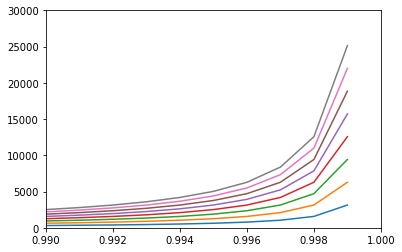

In [14]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()

n = 0
for m in range(8):
    df = co.samples.query(f"pol == 'E' and n == {n} and m == {m + 1}")
    plt.plot(df['rr'], df['val'], label=f"E{n}{m + 1}")
# plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=1, fontsize=7)

plt.xlim(0.99,1.0)
plt.ylim(0,30000)

#0.999まで有効

(0.0, 25000.0)

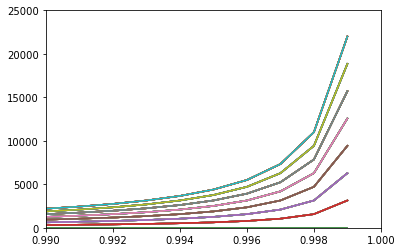

In [12]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()

for n in range(1, 16):
    for m in range(8):
        df = co.samples.query(f"pol == 'E' and n == {n} and m == {m + 1}")
        plt.plot(df['rr'], df['val'], label=f"E{n}{m + 1}")
# plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=1, fontsize=7)

plt.xlim(0.99,1.0)
plt.ylim(0,25000)

#0.999まで有効

(0.0, 0.1)

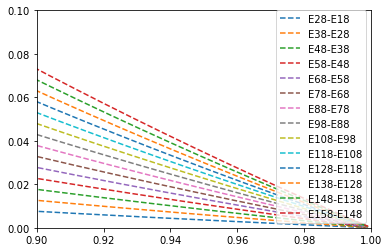

In [6]:
for m in range(7, 8):
    for n in range(1, 15):
        df1 = co.samples.query(f"pol=='E' and n=={n} and m=={m+1}")
        df2 = co.samples.query(f"pol=='E' and n=={n+1} and m=={m+1}")
        val_dif = df2['val'].to_numpy() - df1['val'].to_numpy()
        plt.plot(df1['rr'], val_dif, "--", label=f"E{n+1}{m+1}-E{n}{m+1}")
        
plt.legend()

plt.xlim(0.9,1)
plt.ylim(0,0.1)

(0.0, 30000.0)

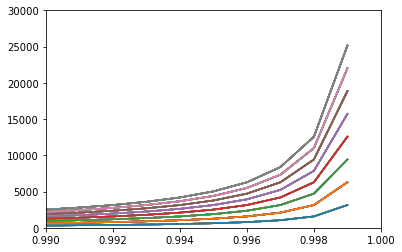

In [8]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()

for n in range(16):
    for m in range(8):
        df = co.samples.query(f"pol=='M' and n=={n} and m=={m+1}")
        plt.plot(df['rr'], df['val'], label=f"M{n}{m+1}")
# plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=1, fontsize=7)

plt.xlim(0.99, 1)
plt.ylim(0,30000)

#0.999まで有効